# Figure S24 notebook to generate figure

Figure S24 CCA analysis to quantify the correlation between trials. Individual points represent the average value for each animal. Controls were done by taking a random samples of neural activities from each animal. \
a) Average correlation along the first 5 components in CCA space for each pair of same-type trials (from the same startbox to the same reward-well). \
b-c) Decoders performance in CCA space and neural space when cross-validated on same-type trials. Chance levels given by the classes of the decoder. \
d) Same analysis as in (a) but on symmetrical trials (where the trials are overlapped if rotated 180°). e-f) Same analysis as in (b) and (c) but on symmetrical trials. \
g) Distance between the positions of the animal for each pair of trajectories, normalized by their length. h) Correlation between the positions of the animal for each pair of trajectories. \
i-l) Percentage of common neurons that are active between each pair of trials.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import utils

# Preprocess the recorded data

## Extract trials for each experiment

A trial is the part of the session where the animal goes from the start box to the reward well. If this happens without detours and long pauses it is classified as a correct trial. \
Each animal has a dataframe that contains all the recordings for that animal. The columns of these dataframes are:
- Session: (e.g. "A28") recording day.
- Stage: ("PRE", "SAM", "CHO") stage of the recording session. "PRE" is exploration at the beginning of the day, "SAM" is the training to the correct reward of the day, and "CHO" is the consolidation phase.
- Combo: (e.g. "WN") the starting and ending box of the day (West to North).
- Reward_well: number of the reward well of the day. 
- Movement_status: ("stationary" or "moving") moving is assigned if the speed is more than 3cm/s (?)
- Cap_x, Cap_y, Leftear_x, Leftear_y, Rightear_x, Rightear_y: animal position registration.
- C000, C001, ...: Cells ID registered across all sessions of the animal. 

In detail, each trial is found by:
1. Add the 'Location' column to the dataframe. It can be: 'arena', 'outside', 'W', 'E', 'N', 'S', '1', '2', '3', '4', '5', '6'. These are the areas in the arena, the start boxes and the reward wells. 'outside' is used when the animal is trying to climb the wall.
2. Add 'Trial' column that is either '0' or '1' for being in a trial or not. The trial starts from the start box to the reward well.
3. Add 'Correct_trial' column with either 'True' or 'False'. A correct trial is not longer than 5s, the animal never tries to climb the wall, and it doesn't stop for more than 1s in any other reward well. 

The dataframes with the added columns: 'Location', 'Trial', 'Correct_trial' is saved for every animal and phase ending with '_events_with_trials.csv'

In [ ]:
for rat in utils.rats:
    for phase in utils.strategies[rat]:
        print("...starting to find trials in rat: ", rat, "phase: ", phase)
        if os.path.exists(
            utils.root_dir
            + "data/"
            + rat
            + "_phase"
            + str(phase)
            + "_events_with_trials.csv"
        ):
            print(
                "Trials already found in rat: "
                + rat
                + ": "
                + utils.root_dir
                + "data/"
                + rat
                + "_phase"
                + str(phase)
                + "_events_with_trials.csv"
            )
            continue
        # Load the dataframe with all the experiments combined
        df = utils.load_df_all_raw(rat, phase)
        # Add locations to the df
        single_dfs = utils.add_locations_and_trials_to_df(df)
        # Stack all dfs and save them
        new_df = pd.concat(single_dfs)
        new_df.to_csv(
            utils.root_dir
            + "data/"
            + rat
            + "_phase"
            + str(phase)
            + "_events_with_trials.csv",
            index=False,
        )
        print(
            "\tTrials found and saved in rat: "
            + rat
            + ": "
            + utils.root_dir
            + "data/"
            + rat
            + "_phase"
            + str(phase)
            + "_events_with_trials.csv"
        )
        break
    break

...starting to find trials in rat:  H2226 phase:  1
Finished experiment  ('A28', 'CHO')
Finished experiment  ('A28', 'PRE')
Finished experiment  ('A28', 'SAM')
Finished experiment  ('A29', 'CHO')
Finished experiment  ('A29', 'PRE')
Finished experiment  ('A29', 'SAM')
Finished experiment  ('A30', 'CHO')
Finished experiment  ('A30', 'PRE')
Finished experiment  ('A30', 'SAM')
Finished experiment  ('A31', 'CHO')
Finished experiment  ('A31', 'PRE')
Finished experiment  ('A31', 'SAM')
Finished experiment  ('A32', 'CHO')
Finished experiment  ('A32', 'POS')
Finished experiment  ('A32', 'PRE')
Finished experiment  ('A32', 'SAM')
Finished experiment  ('A33', 'CHO')
Finished experiment  ('A33', 'PRE')
Finished experiment  ('A33', 'SAM')
Finished experiment  ('A34', 'CHO')
Finished experiment  ('A34', 'CTC')
Finished experiment  ('A34', 'POS')
Finished experiment  ('A34', 'PRE')
Finished experiment  ('A34', 'SAM')
	Trials found and saved in rat: H2226: /Users/elenafaillace/Library/CloudStorage/One

## Transform the events in firing rates
Convolve the events with a Gaussian kernal to obtain the probability distribution of the neuron firing. The standard deviation is set to 0.2s.


In [ ]:
for rat in utils.rats:
    for phase in utils.strategies[rat]:
        print(
            "...starting to convert events to firing rates in rat: ",
            rat,
            "phase: ",
            phase,
        )
        utils.save_df_all_data_firing_rates(rat, phase)
        print(
            "\tFiring rates saved in rat: "
            + rat
            + ": "
            + utils.root_dir
            + "data/"
            + rat
            + "_phase"
            + str(phase)
            + "_data_with_firing_rates.csv"
        )
        break
    break

...starting to convert events to firing rates in rat:  H2226 phase:  1
Starting saving firing rates for rat H2226...
	Firing rates saved in rat: H2226: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/H2226_phase1_data_with_firing_rates.csv


## Save info summary with all the correct trials for each experiment
Create a dataframe where each row represents a trial, and reports: the start and end box + the rewarded well + the trial number + if the trial was correct or not.

The final dataframe has a summery then of all the correct trials with the columns:
'Rat', 'Strategy', 'Session', 'Stage', 'Combo', 'Rewarded_well', 'Trial', 'Correct_trial'. \
Combo is the start and end box (e.g. NW).

In [ ]:
for phase in [1, 2]:
    utils.get_summary_trials(phase=phase)
    break

...starting to find trials in rat:  H2226
...starting to find trials in rat:  H2225
...starting to find trials in rat:  H2230
...starting to find trials in rat:  H2234
...starting to find trials in rat:  H2241
...starting to find trials in rat:  H2222
...starting to find trials in rat:  H2224
...starting to find trials in rat:  H2231
...starting to find trials in rat:  H2235


,Rat,Strategy,Session,Stage,Combo,Rewarded_well,Trial,Correct_trial
0,H2226,ALLO,A28,CHO,WN,6,1,1
1,H2226,ALLO,A28,CHO,SN,6,2,0
2,H2226,ALLO,A28,CHO,WN,6,3,0
3,H2226,ALLO,A28,CHO,EN,6,4,0
4,H2226,ALLO,A28,PRE,WW,6,1,0


	Trials found and saved in phase: 1: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/phase1_all_trials_info.csv


## Extract symmetrical trials

For each trial's combo I only want consider the path from the start box to the rewarded well, regardless of the end box. Therefore, I redefined 'combo' as the combination of start box + rewarded well only (e.g. N5 would be starting from the North box and reaching for rewarded well 5).

For each trial combo we defined a symmetrical combo and a control combo. The symmetrical combo is symmetrical along the x and y axis, but requires from the animal to perform the same movements (they are identical from an egocentric prespective). The control combo is symmetrical along one axis only, making the two trajectories differ from an egocentric perspective. 

For each phase we save a file that ends with '_symmetrical_trials_data.pkl' that contains a dictionary with the structure: \
rat -> (combo, symm_combo) -> (trial combo, session, stage, trial number) -> (x, y, trial info row). Where 'x' and 'y' are the xy-coordinates along the trial.

An example is: \
H2226 -> (W1, E6) -> ('W1', 'A29', 'SAM', 2) -> (x, y, all_data)

This is used to easly access the correct trials only, and their symmetrical and controls counterparts.

In [ ]:
for phase in [1, 2]:
    print("\nPhase: ", phase)
    utils.save_symmetrical_trials_data(phase=phase)


Phase:  1
Starting rat H2226...
...symmetrical pair of trials found: W1 and E6
...symmetrical pair of trials found: E1 and W6
...symmetrical pair of trials found: W5 and E2
Starting rat H2225...
...symmetrical pair of trials found: W5 and E2
...symmetrical pair of trials found: E5 and W2
Starting rat H2230...
...symmetrical pair of trials found: W1 and E6
...symmetrical pair of trials found: E1 and W6
Starting rat H2234...
...symmetrical pair of trials found: W1 and E6
Starting rat H2241...
...symmetrical pair of trials found: W1 and E6
...symmetrical pair of trials found: E1 and W6
...symmetrical pair of trials found: W5 and E2
Starting rat H2222...
Starting rat H2224...
...symmetrical pair of trials found: W1 and E6
Starting rat H2231...
...symmetrical pair of trials found: E1 and W6
Starting rat H2235...

Phase:  2
File already exists: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/phase2_symmetrical_trials_data.pkl


## Save the PCA space of each recording

Given that each trial has a relatively small number of active neurons at the same time, I project all the trials in a PCA space that is common for all the recording session, during correct trials. Here I find the projection matrix for each recording and save it.

The saved data will be saved for each animal in a pickle that ends with '_all_experiments_pca_space.pkl'. Each dictionary will be: \
session -> stage -> ['components', 'firing_rates', 'explained_variance', 'neurons_id']. \
Where neurons_id is the IDs of neurons that are used for the pca components, and firing_rates is the data used to find the components.

If there are not enough neurons kept, all the variables are = 0. This happens in the case there are no enough correct trials where to extract the firing rates from.

In [ ]:
for phase in [1, 2]:
    print("\nPhase: ", phase)
    utils.transform_pca_space_all_sessions(phase=phase)


Phase:  1
PCA space already exists for phase 1 and rat:H2226, at path: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/H2226_phase1_all_experiments_pca_space.pkl
PCA space already exists for phase 1 and rat:H2225, at path: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/H2225_phase1_all_experiments_pca_space.pkl
PCA space already exists for phase 1 and rat:H2230, at path: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/H2230_phase1_all_experiments_pca_space.pkl
PCA space already exists for phase 1 and rat:H2234, at path: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code_review/data/H2234_phase1_all_experiments_pca_space.pkl
PCA space already exists for phase 1 and rat:H2241, at path: /Users/elenafaillace/Library/CloudStorage/OneDrive-ImperialCollegeLondon/arena2.0/paper_code

# CCA between symmetrical trials

## Sample control neural activity

To use as control, given a phase and a strategy, we sample randomly the neural activity from any animal from that phase and strategy, using only SAM and CHO stages (where trials are selected from).

In [2]:
for phase in [1, 2]:
    print("\nPhase: ", phase)
    utils.get_random_sample_neural_activity(n_samples=100, phase=phase, strategy="ALLO")
    utils.get_random_sample_neural_activity(n_samples=100, phase=phase, strategy="EGO")


Phase:  1
Starting to extract random samples of neural activity from phase 1 and strategy ALLO...
number of samples taken: 10/100
number of samples taken: 20/100
number of samples taken: 30/100
number of samples taken: 40/100
number of samples taken: 50/100
number of samples taken: 60/100
number of samples taken: 70/100
number of samples taken: 80/100
number of samples taken: 90/100
number of samples taken: 100/100
Finished extracting random samples of neural activity-100
Starting to extract random samples of neural activity from phase 1 and strategy EGO...
number of samples taken: 10/100
number of samples taken: 20/100
number of samples taken: 30/100
number of samples taken: 40/100
number of samples taken: 50/100
number of samples taken: 60/100
number of samples taken: 70/100
number of samples taken: 80/100
number of samples taken: 90/100
number of samples taken: 100/100
Finished extracting random samples of neural activity-100

Phase:  2
File of rat H2235 not found
Starting to extra

## Calculate CCA correlations

For each pair of symmetrical trials we find the CCA alignment between the symmetrical trials, identical trials and controls (selected for phase and strategy).

For each phase, for each animal, all pairs of correct symmetrical trials are alinged and the results salved in a dictionary with the structure: \
rat -> (combo, symmetrical_combo) -> (trial 1 details, trial 2 details) -> ['r', 'A', 'B', 'U', 'V', 'trial1': ['x', 'y', 'all_neurons', 'active_neurons'], 'trial2': [...]]

Where combo is start box + rewarded well. Trial 2 are also substituted with the randomly sampled neural activity saved before for control.  

In [ ]:
for phase in [1, 2]:
    # This depends on PCA analysis previously done, this number of can components includes a good number of trials.
    if phase == 1:
        n_components_pca = 30
    else:
        n_components_pca = 13
    n_components_cca = 5

    utils.calculate_cca_correlations(
        phase=phase,
        n_components_pca=n_components_pca,
        n_components_cca=n_components_cca,
    )

Starting CCA analysis of rat: H2226
...looking into symmetrical trials: ('W1', 'E6')
Comparing experiments ('W1', 'A29', 'SAM', 2) ---- ('W1', 'A32', 'CHO', 1)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A29', 'SAM', 2) ---- ('W1', 'A32', 'CHO', 3)
...CCA number of canonical components: 9
Comparing experiments ('W1', 'A29', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 3)
...CCA number of canonical components: 9
Comparing experiments ('W1', 'A32', 'CHO', 1) ---- ('W1', 'A32', 'CHO', 3)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A32', 'CHO', 1) ---- ('E6', 'A31', 'CHO', 3)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A32', 'CHO', 3) ---- ('E6', 'A31', 'CHO', 3)
...CCA number of canonical components: 10
Control trial: ('W1', 'A29', 'SAM', 2)
1
Comparing experiments ('W1', 'A29', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('W1', 'A32', 'CHO', 1)
1
Comparing experiments ('W1', 'A32', 

Comparing experiments ('E1', 'A32', 'CHO', 2) ---- ('W6', 'A28', 'CHO', 1)
...CCA number of canonical components: 16
Comparing experiments ('E1', 'A32', 'CHO', 2) ---- ('W6', 'A28', 'SAM', 1)
...CCA number of canonical components: 17
Comparing experiments ('E1', 'A32', 'CHO', 2) ---- ('W6', 'A28', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E1', 'A32', 'CHO', 2) ---- ('W6', 'A31', 'CHO', 2)
...CCA number of canonical components: 20
Comparing experiments ('E1', 'A32', 'CHO', 2) ---- ('W6', 'A31', 'SAM', 3)
...CCA number of canonical components: 18
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- ('W6', 'A28', 'CHO', 1)
...CCA number of canonical components: 16
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- ('W6', 'A28', 'SAM', 1)
...CCA number of canonical components: 17
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- ('W6', 'A28', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- ('W6', 'A31', '

...CCA number of canonical components: 16
Comparing experiments ('W6', 'A28', 'CHO', 1) ---- ('W6', 'A28', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('W6', 'A28', 'CHO', 1) ---- ('W6', 'A31', 'CHO', 2)
...CCA number of canonical components: 16
Comparing experiments ('W6', 'A28', 'CHO', 1) ---- ('W6', 'A31', 'SAM', 3)
...CCA number of canonical components: 16
Comparing experiments ('W6', 'A28', 'SAM', 1) ---- ('W6', 'A28', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('W6', 'A28', 'SAM', 1) ---- ('W6', 'A31', 'CHO', 2)
...CCA number of canonical components: 17
Comparing experiments ('W6', 'A28', 'SAM', 1) ---- ('W6', 'A31', 'SAM', 3)
...CCA number of canonical components: 17
Comparing experiments ('W6', 'A28', 'SAM', 3) ---- ('W6', 'A31', 'CHO', 2)
...CCA number of canonical components: 9


Comparing experiments ('W6', 'A28', 'SAM', 3) ---- ('W6', 'A31', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('W6', 'A31', 'CHO', 2) ---- ('W6', 'A31', 'SAM', 3)
...CCA number of canonical components: 18
Control trial: ('E1', 'A29', 'SAM', 3)
1
Comparing experiments ('E1', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 5
Control trial: ('E1', 'A32', 'CHO', 2)
1
Comparing experiments ('E1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E1', 'A32', 'SAM', 2)
1
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- control
...CCA number of canonical components: 4
3
Comparing experiments ('E1', 'A32', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('W6', 'A28', 'CHO', 1)
1
Comparing experiments ('W6', 'A28', 'CHO', 1) ---- control
...CCA number of canonical components: 5

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y


Comparing experiments ('E2', 'A34', 'CHO', 4) ---- ('E2', 'A34', 'SAM', 1)
...CCA number of canonical components: 9
Control trial: ('W5', 'A30', 'CHO', 4)
1
Comparing experiments ('W5', 'A30', 'CHO', 4) ---- control
...CCA number of canonical components: 5
Control trial: ('W5', 'A30', 'SAM', 2)
1
Comparing experiments ('W5', 'A30', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E2', 'A34', 'CHO', 2)
1
Comparing experiments ('E2', 'A34', 'CHO', 2) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('E2', 'A34', 'CHO', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E2', 'A34', 'CHO', 4)
1
Comparing experiments ('E2', 'A34', 'CHO', 4) ---- control
...CCA number of canonical components: 5
Control trial: ('E2', 'A34', 'SAM', 1)
1
Comparing experiments ('E2', 'A34', 'SAM', 1) ---- control
...CCA number of canonical components: 5
Starting CCA analysis of rat: H2225
...looking into symmetrical trials: ('W5'

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncor

Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A28', 'SAM', 1)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A28', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A32', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A32', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A34', 'CHO', 1)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A34', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('E6', 'A29', 'CHO', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('E6', 'A29', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('E6', 'A31', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 1) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experimen

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncor

Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('W1', 'A34', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('E6', 'A29', 'CHO', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('E6', 'A29', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('E6', 'A31', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A28', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A32', 'CHO', 2)
...CCA number of canonical components: 1
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A32', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A34', 'CHO', 1)
Error in CCA
Comp

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('W1', 'A34', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('W1', 'A34', 'SAM', 2)
...CCA number of canonical components: 1
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('E6', 'A29', 'CHO', 3)
Error in CCA
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('E6', 'A29', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('E6', 'A31', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'CHO', 1)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A29', 'CHO', 3)
Error in CCA
Comp

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'A29', 'CHO', 3) ---- ('E6', 'A29', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'A29', 'CHO', 3) ---- ('E6', 'A31', 'CHO', 2)
Error in CCA
Comparing experiments ('E6', 'A29', 'CHO', 3) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('E6', 'A29', 'CHO', 3) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'CHO', 2)
Error in CCA
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 2)
Error in CCA
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'A3

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

Error in CCA
7
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- control
Error in CCA
8
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- control
Error in CCA
9
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- control
Error in CCA
10
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- control
Error in CCA
Control trial: ('W1', 'A32', 'CHO', 2)
1
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
2
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
3
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
4
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
5
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
6
Comparing experiments ('W1', 'A32', 'CHO', 2) ---- control
...CCA number of canonical components: 1
7
Comparing experiments ('W1', 'A32', '

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y


Comparing experiments ('W6', 'A31', 'SAM', 1) ---- control
...CCA number of canonical components: 1
8
Comparing experiments ('W6', 'A31', 'SAM', 1) ---- control
...CCA number of canonical components: 1
9
Comparing experiments ('W6', 'A31', 'SAM', 1) ---- control
...CCA number of canonical components: 1
10
Comparing experiments ('W6', 'A31', 'SAM', 1) ---- control
...CCA number of canonical components: 1
Starting CCA analysis of rat: H2234
...looking into symmetrical trials: ('W1', 'E6')
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- ('W1', 'A32', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- ('W1', 'A32', 'CHO', 4)
...CCA number of canonical components: 1
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- ('W1', 'A32', 'SAM', 2)
...CCA number of canonical components: 1
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- ('W1', 'A32', 'SAM', 3)
...CCA number of canonical components: 1
Comparing experiments ('W1', 'A28', 'SAM', 3) ---- ('W1', 'A34', 'CHO', 

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

...CCA number of canonical components: 3
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'CHO', 4)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 3
Comparing experiments ('W1', 'A32', 'SAM', 3) ---- ('W1', 'A34', 'CHO', 4)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 3) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A32', 'SAM', 3) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A32', 'SAM', 3) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 3
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('W1', 'A34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('E6

...CCA number of canonical components: 3
5
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
6
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
7
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
8
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
9
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
10
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- control
...CCA number of canonical components: 3
Starting CCA analysis of rat: H2241
...looking into symmetrical trials: ('W1', 'E6')
Comparing experiments ('W1', 'A32', 'CHO', 1) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 5
Control trial: ('W1', 'A32', 'CHO', 1)
1
Comparing experiments ('W1', 'A32', 'CHO', 1) ---- control
...CCA number of canonical components: 5
Cont

...CCA number of canonical components: 2
10
Comparing experiments ('E2', 'A33', 'CHO', 3) ---- control
...CCA number of canonical components: 2
Starting CCA analysis of rat: H2222
Starting CCA analysis of rat: H2224
...looking into symmetrical trials: ('W1', 'E6')
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E29', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E29', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E29', 'SAM', 1)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E29', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('W1', 'E31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CH

Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E29', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E29', 'SAM', 1)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E29', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E31', 'CHO', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('W1', 'E31', 'SAM', 

Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('W1', 'E29', 'SAM', 1)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('W1', 'E29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('W1', 'E29', 'SAM', 3)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('W1', 'E31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('W1', 'E31', 'CHO', 

Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'E29', 'CHO', 4) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E29', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E31', 'CHO', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E31', 'SAM', 1)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('W1', 'E31', 'SAM', 2)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 1) ---- ('E6', 'E30', 'CHO', 

Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('W1', 'E29', 'SAM', 3)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('W1', 'E31', 'CHO', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('W1', 'E31', 'CHO', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('W1', 'E31', 'SAM', 1)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('W1', 'E31', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('E6', 'E30', 'CHO', 4)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('E6', 'E30', 'SAM', 1)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('E6', 'E30', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E29', 'SAM', 2) ---- ('E6', 'E30', 'SAM', 

Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E30', 'CHO', 4)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E30', 'SAM', 1)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E30', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E30', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E33', 'CHO', 1)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E33', 'CHO', 2)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E29', 'SAM', 3) ---- ('E6', 'E33', 'SAM', 

Comparing experiments ('W1', 'E31', 'CHO', 2) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E31', 'CHO', 2) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E31', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E31', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E31', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'E31', 'CHO', 3) ---- ('W1', 'E31', 'SAM', 1)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E31', 'CHO', 3) ---- ('W1', 'E31', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E31', 'CHO', 3) ---- ('E6', 'E30', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E31', 'CHO', 3) ---- ('E6', 'E30', 'SAM', 

Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E30', 'SAM', 1)
...CCA number of canonical components: 9
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E30', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E30', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'CHO', 1)
...CCA number of canonical components: 13
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'CHO', 2)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 11
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 8
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 14
Comparing experiments ('W1', 'E31', 'SAM', 1) ---- ('E6', 'E33', 'SAM

...CCA number of canonical components: 8
Comparing experiments ('W1', 'E31', 'SAM', 2) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E30', 'SAM', 1)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E30', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E30', 'SAM', 3)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E33', 'CHO', 1)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E33', 'CHO', 2)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E30', 'CHO', 4) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 5
Comparing experiments ('E6', 'E

Comparing experiments ('E6', 'E30', 'SAM', 1) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E30', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'CHO', 1)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'CHO', 2)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'E30', 'SAM', 2) ---- ('E6', 'E33', 'SAM', 

Comparing experiments ('E6', 'E33', 'CHO', 1) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 11
Comparing experiments ('E6', 'E33', 'CHO', 1) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 1) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 13
Comparing experiments ('E6', 'E33', 'CHO', 1) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 9
Comparing experiments ('E6', 'E33', 'CHO', 1) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 10
Comparing experiments ('E6', 'E33', 'CHO', 2) ---- ('E6', 'E33', 'CHO', 3)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 2) ---- ('E6', 'E33', 'CHO', 4)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 2) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 2) ---- ('E6', 'E33', 'SAM

Comparing experiments ('E6', 'E33', 'CHO', 4) ---- ('E6', 'E33', 'SAM', 1)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 4) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'CHO', 4) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 8
Comparing experiments ('E6', 'E33', 'SAM', 1) ---- ('E6', 'E33', 'SAM', 2)
...CCA number of canonical components: 9
Comparing experiments ('E6', 'E33', 'SAM', 1) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 10
Comparing experiments ('E6', 'E33', 'SAM', 2) ---- ('E6', 'E33', 'SAM', 3)
...CCA number of canonical components: 9
Control trial: ('W1', 'E29', 'CHO', 2)
1
Comparing experiments ('W1', 'E29', 'CHO', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('W1', 'E29', 'CHO', 3)
1
Comparing experiments ('W1', 'E29', 'CHO', 3) ---- control
...CCA number of canonical components: 5
Control trial: ('W1',

...CCA number of canonical components: 5
Control trial: ('E6', 'E33', 'CHO', 4)
1
Comparing experiments ('E6', 'E33', 'CHO', 4) ---- control
...CCA number of canonical components: 5
Control trial: ('E6', 'E33', 'SAM', 1)
1
Comparing experiments ('E6', 'E33', 'SAM', 1) ---- control
...CCA number of canonical components: 5
Control trial: ('E6', 'E33', 'SAM', 2)
1
Comparing experiments ('E6', 'E33', 'SAM', 2) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('E6', 'E33', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E6', 'E33', 'SAM', 3)
1
Comparing experiments ('E6', 'E33', 'SAM', 3) ---- control
...CCA number of canonical components: 5
Starting CCA analysis of rat: H2231
...looking into symmetrical trials: ('E1', 'W6')
Comparing experiments ('E1', 'E29', 'SAM', 2) ---- ('E1', 'E33', 'CHO', 1)
...CCA number of canonical components: 9
Comparing experiments ('E1', 'E29', 'SAM', 2) ---- ('E1', 'E33', 'CHO', 2)
...CCA number of 

Comparing experiments ('E1', 'E33', 'SAM', 3) ---- ('W6', 'E31', 'CHO', 1)
...CCA number of canonical components: 6
Comparing experiments ('E1', 'E33', 'SAM', 3) ---- ('W6', 'E31', 'CHO', 2)
...CCA number of canonical components: 12
Comparing experiments ('E1', 'E33', 'SAM', 3) ---- ('W6', 'E31', 'SAM', 2)
...CCA number of canonical components: 9
Comparing experiments ('W6', 'E31', 'CHO', 1) ---- ('W6', 'E31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W6', 'E31', 'CHO', 1) ---- ('W6', 'E31', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('W6', 'E31', 'CHO', 2) ---- ('W6', 'E31', 'SAM', 2)
...CCA number of canonical components: 9
Control trial: ('E1', 'E29', 'SAM', 2)
1
Comparing experiments ('E1', 'E29', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E1', 'E33', 'CHO', 1)
1
Comparing experiments ('E1', 'E33', 'CHO', 1) ---- control
...CCA number of canonical components: 4
2
Comparing experimen

Starting CCA analysis of rat: H2226
...looking into symmetrical trials: ('W1', 'E6')
No PCA space available for trial: ('W1', 'A29', 'SAM', 2) of rat: H2226 in phase: 2
No PCA space available for trial: ('W1', 'A32', 'CHO', 1) of rat: H2226 in phase: 2
Error in PCA... skipping this pair of trials because problems in neurons ID: ('W1', 'A29', 'SAM', 2) ---- ('W1', 'A32', 'CHO', 1)
No PCA space available for trial: ('W1', 'A29', 'SAM', 2) of rat: H2226 in phase: 2
No PCA space available for trial: ('W1', 'A32', 'CHO', 3) of rat: H2226 in phase: 2
Error in PCA... skipping this pair of trials because problems in neurons ID: ('W1', 'A29', 'SAM', 2) ---- ('W1', 'A32', 'CHO', 3)
No PCA space available for trial: ('W1', 'A29', 'SAM', 2) of rat: H2226 in phase: 2
No PCA space available for trial: ('E6', 'A31', 'CHO', 3) of rat: H2226 in phase: 2
Error in PCA... skipping this pair of trials because problems in neurons ID: ('W1', 'A29', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 3)
No PCA space availabl

...CCA number of canonical components: 3
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E29', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E29', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 1)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6


Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E28', 'CHO', 2) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E28', 'CHO', 4)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E31', 'CHO', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E31', 'CHO', 3)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E31', 'CHO', 4)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E31', 'SAM', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('E5', 'E31', 'SAM', 

Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'CHO', 1)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'CHO', 3)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'CHO', 4)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'SAM', 1)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'SAM', 2)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E28', 'CHO', 4) ---- ('E5', 'E31', 'SA

Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('E5', 'E31', 'CHO', 4)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('E5', 'E31', 'SAM', 1)
...CCA number of canonical components: 13
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('E5', 'E31', 'SAM', 2)
...CCA number of canonical components: 11
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('E5', 'E31', 'SAM', 3)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('W2', 'E29', 'CHO', 3)
...CCA number of canonical components: 3
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('W2', 'E29', 'CHO', 4)
...CCA number of canonical components: 7
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('W2', 'E29', 'SAM', 2)
...CCA number of canonical components: 13
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'CHO', 1) ---- ('W2', 'E34', 'CH

...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 2)
...CCA number of canonical components: 8
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E5', 'E31', 'CHO', 4) ---- ('E5', 'E31', 'SAM', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5',

Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E29', 'CHO', 3)
...CCA number of canonical components: 3
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E29', 'CHO', 4)
...CCA number of canonical components: 7
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E29', 'SAM', 2)
...CCA number of canonical components: 13
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E34', 'CHO', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E34', 'CHO', 2)
...CCA number of canonical components: 8
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'SAM', 1) ---- ('W2', 'E34', 'SAM'

Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'CHO', 1)
...CCA number of canonical components: 9
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'CHO', 2)
...CCA number of canonical components: 8
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 10
Comparing experiments ('E5', 'E31', 'SAM', 3) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W2', 'E29', 'CHO', 3) ---- ('W2', 'E29', 'CHO', 4)
...CCA number of canonical components: 3
Comparing experiments ('W2', 'E29', 'CHO', 3) ---- ('W2', 'E29', 'SAM'

Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E29', 'SAM', 2)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E29', 'SAM', 3)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'CHO', 1)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'CHO', 2)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 7
Comparing experiments ('W2', 'E29', 'CHO', 4) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W2', 'E29', 'SAM', 2) ---- ('W2', 'E29', 'SAM', 

Comparing experiments ('W2', 'E34', 'CHO', 1) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 9
Comparing experiments ('W2', 'E34', 'CHO', 1) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W2', 'E34', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 3)
...CCA number of canonical components: 6
Comparing experiments ('W2', 'E34', 'CHO', 2) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 8
Comparing experiments ('W2', 'E34', 'CHO', 2) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 8
Comparing experiments ('W2', 'E34', 'CHO', 2) ---- ('W2', 'E34', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W2', 'E34', 'CHO', 3) ---- ('W2', 'E34', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('W2', 'E34', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('W2', 'E34', 'CHO', 3) ---- ('W2', 'E34', 'SAM', 

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y


Comparing experiments ('W2', 'E34', 'CHO', 1) ---- control
...CCA number of canonical components: 5
Control trial: ('W2', 'E34', 'CHO', 2)
1
Comparing experiments ('W2', 'E34', 'CHO', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('W2', 'E34', 'CHO', 3)
1
Comparing experiments ('W2', 'E34', 'CHO', 3) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('W2', 'E34', 'CHO', 3) ---- control
...CCA number of canonical components: 5
Control trial: ('W2', 'E34', 'CHO', 4)
1
Comparing experiments ('W2', 'E34', 'CHO', 4) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('W2', 'E34', 'CHO', 4) ---- control
...CCA number of canonical components: 5
Control trial: ('W2', 'E34', 'SAM', 2)
1
Comparing experiments ('W2', 'E34', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('W2', 'E34', 'SAM', 3)
1
Comparing experiments ('W2', 'E34', 'SAM', 3) ---- control
...CCA number of canonical compo

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

...CCA number of canonical components: 1
Comparing experiments ('W1', 'E33', 'SAM', 3) ---- ('E6', 'E30', 'SAM', 3)
Error in CCA
Comparing experiments ('W1', 'E33', 'SAM', 3) ---- ('E6', 'E34', 'CHO', 2)
Error in CCA
Comparing experiments ('W1', 'E33', 'SAM', 3) ---- ('E6', 'E34', 'SAM', 2)
Error in CCA
Comparing experiments ('W1', 'E33', 'SAM', 3) ---- ('E6', 'E34', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'E30', 'SAM', 3) ---- ('E6', 'E34', 'CHO', 2)
Error in CCA
Comparing experiments ('E6', 'E30', 'SAM', 3) ---- ('E6', 'E34', 'SAM', 2)
Error in CCA
Comparing experiments ('E6', 'E30', 'SAM', 3) ---- ('E6', 'E34', 'SAM', 3)
...CCA number of canonical components: 2
Comparing experiments ('E6', 'E34', 'CHO', 2) ---- ('E6', 'E34', 'SAM', 2)
Error in CCA
Comparing experiments ('E6', 'E34', 'CHO', 2) ---- ('E6', 'E34', 'SAM', 3)
Error in CCA
Comparing experiments ('E6', 'E34', 'SAM', 2) ---- ('E6', 'E34', 'SAM', 3)
Error in CCA
Control trial: ('W1', 'E29', 'SAM', 1)
1
Comparing 

ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y


Comparing experiments ('E1', 'E30', 'SAM', 2) ---- ('W6', 'E29', 'SAM', 2)
Error in CCA
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- ('W6', 'E29', 'SAM', 3)
Error in CCA
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- ('W6', 'E31', 'SAM', 1)
Error in CCA
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- ('W6', 'E31', 'SAM', 3)
Error in CCA
Comparing experiments ('E1', 'E34', 'CHO', 2) ---- ('E1', 'E34', 'SAM', 2)
...CCA number of canonical components: 1
Comparing experiments ('E1', 'E34', 'CHO', 2) ---- ('W6', 'E29', 'SAM', 2)
...CCA number of canonical components: 1
Comparing experiments ('E1', 'E34', 'CHO', 2) ---- ('W6', 'E29', 'SAM', 3)
...CCA number of canonical components: 1
Comparing experiments ('E1', 'E34', 'CHO', 2) ---- ('W6', 'E31', 'SAM', 1)
Error in CCA
Comparing experiments ('E1', 'E34', 'CHO', 2) ---- ('W6', 'E31', 'SAM', 3)
Error in CCA
Comparing experiments ('E1', 'E34', 'SAM', 2) ---- ('W6', 'E29', 'SAM', 2)
...CCA number of canonical components: 1
Comparin

ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = Y
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncorr:BadData = X
ERROR:root:stats:canoncor

Comparing experiments ('W6', 'E29', 'SAM', 3) ---- ('W6', 'E31', 'SAM', 1)
Error in CCA
Comparing experiments ('W6', 'E29', 'SAM', 3) ---- ('W6', 'E31', 'SAM', 3)
Error in CCA
Comparing experiments ('W6', 'E31', 'SAM', 1) ---- ('W6', 'E31', 'SAM', 3)
Error in CCA
Control trial: ('E1', 'E30', 'SAM', 2)
1
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
2
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
3
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
4
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
5
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
6
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
7
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
8
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
9
Comparing experiments ('E1', 'E30', 'SAM', 2) ---- control
Error in CCA
10
Comparing experiments ('E1',

Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A29', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A31', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 3) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('W1', 'A28', 'SAM', 1)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('W1', 'A28', 'SAM', 3)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A28', 'CHO', 4) ---- ('W1', 'A32', 'SAM', 

Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A34', 'CHO', 1)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A34', 'CHO', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A34', 'CHO', 4)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('W1', 'A34', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('E6', 'A29', 'CHO', 3)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('E6', 'A29', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A28', 'SAM', 1) ---- ('E6', 'A31', 'CHO', 

Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'CHO', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('W1', 'A34', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A29', 'CHO', 3)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A29', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A32', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 

Comparing experiments ('W1', 'A34', 'CHO', 2) ---- ('E6', 'A29', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A34', 'CHO', 2) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A34', 'CHO', 2) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A34', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A34', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('W1', 'A34', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('E6', 'A29', 'CHO', 3)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 5
Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('E6', 'A29', 'SAM', 

Comparing experiments ('W1', 'A34', 'CHO', 4) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A29', 'CHO', 3)
...CCA number of canonical components: 2
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A29', 'SAM', 2)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A29', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 6
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 2)
...CCA number of canonical components: 7
Comparing experiments ('W1', 'A34', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A29', 'CHO', 3) ---- ('E6', 'A29', 'SAM', 

...CCA number of canonical components: 7
Comparing experiments ('E6', 'A29', 'SAM', 2) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'CHO', 2)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'SAM', 2)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- ('E6', 'A31', 'CHO', 4)
...CCA number of canonical components: 6
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 2)
...CCA number of canonical components: 6
Comparing experiments ('E6', 'A31', 'CHO', 2) ---- ('E6', 'A31', 'SAM', 3)
...CCA number of canonical components: 4
Comparing experiments ('E6', 'A

1
Comparing experiments ('E6', 'A29', 'SAM', 2) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('E6', 'A29', 'SAM', 2) ---- control
...CCA number of canonical components: 5
Control trial: ('E6', 'A29', 'SAM', 3)
1
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
2
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
3
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
4
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
5
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
6
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
7
Comparing experiments ('E6', 'A29', 'SAM', 3) ---- control
...CCA number of canonical components: 4
8
Comparing experiments ('E6', 'A29', 'SAM'

# Decode position

From the nerual space and the CCA space decode position. We trained aligned two trajectories and train the decoder on one trial and testing on the other aligned trial. We do this for identical combos (start box + rewarded well), and for symmetrical combos. 

In [6]:
n_components_cca = 5
for phase in [1, 2]:
    print(f"Phase: {phase}")
    utils.get_decoders_results(phase=phase, n_components_cca=n_components_cca)

Phase: 1
Rat: H2226
Rat: H2225
Rat: H2230
Rat: H2234
Rat: H2241
Rat: H2222
Rat: H2224
Rat: H2231
Rat: H2235
Phase: 2
Rat: H2226
Rat: H2225


/Users/elenafaillace/Documents/all_code/ego-allo-paper/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/Users/elenafaillace/Documents/all_code/ego-allo-paper/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")


Rat: H2234
Rat: H2241
Rat: H2222
Rat: H2224
Rat: H2231


# Write all results in one file to then plot them

Save the results of all the above analysis in a file ending with "_figures_data.csv". This will be used for easier plotting. Each row is a pair of trial that got aligned and used to decode position. Controls are also in the file.

In [2]:
for phase in [1, 2]:
    summary = utils.make_summary_results(phase=phase)
    utils.save_figures_data(summary, phase=phase)

# Plot the full pannel 

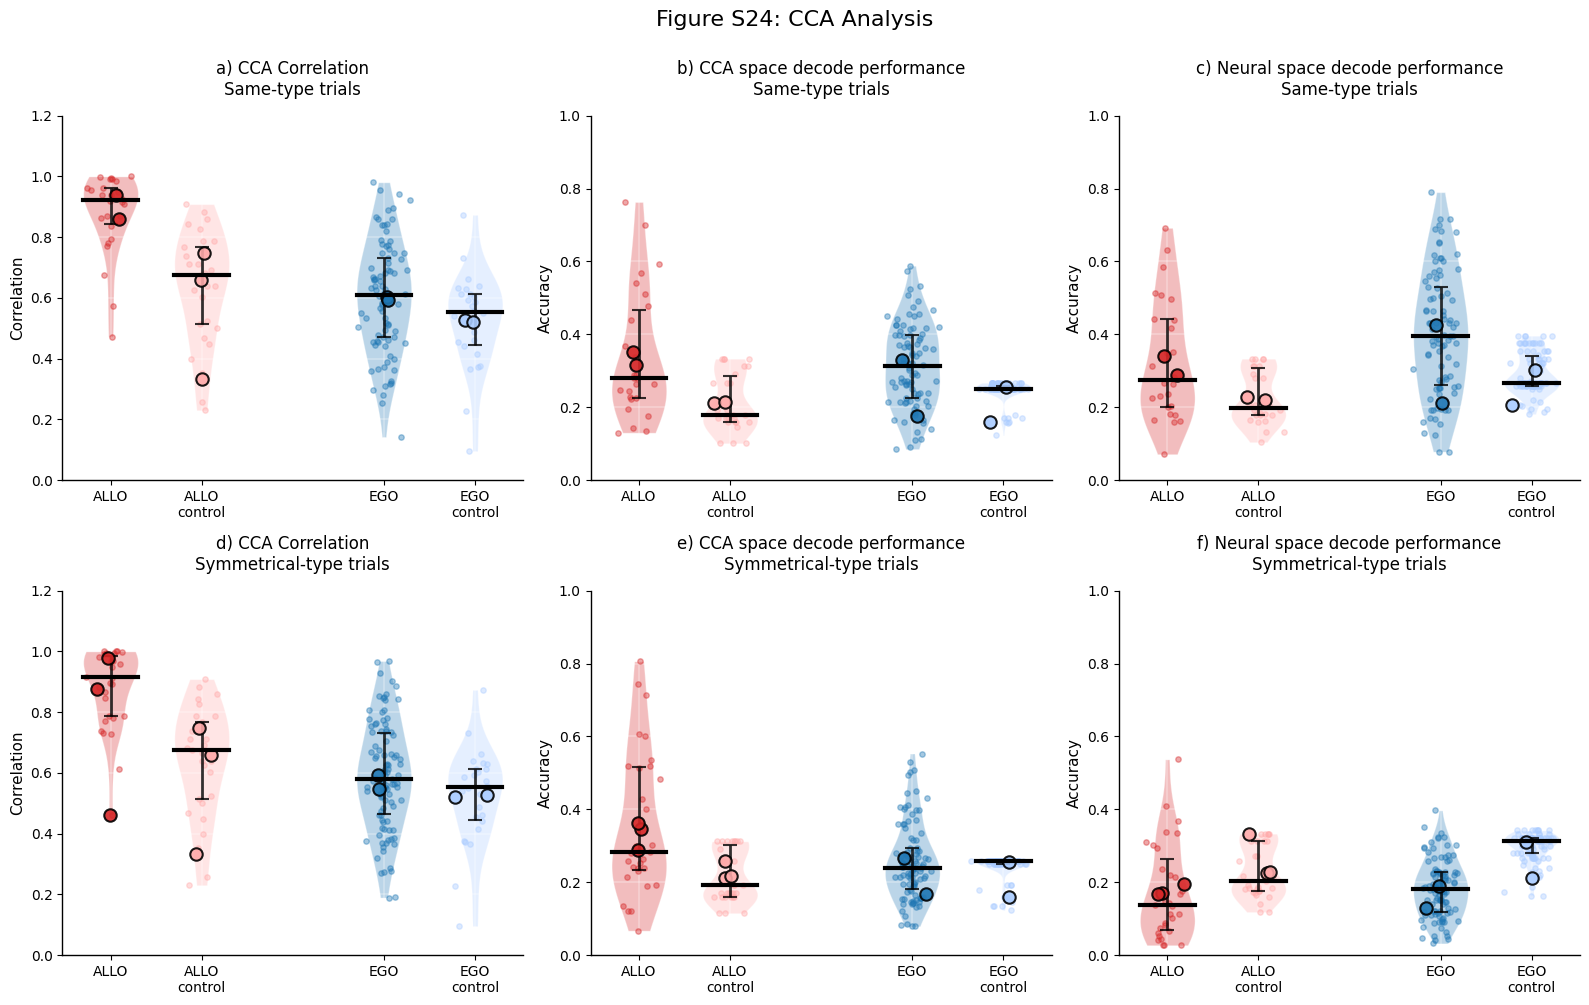

In [7]:
# Load the summary results
phase = 1
summary_data = utils.load_summary_figures_data(phase=phase)

# Set up the plotting style
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Create figure with subplots for CCA results
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Increased height from 8 to 10
fig.suptitle("Figure S24: CCA Analysis", fontsize=16, y=1)  # Adjusted y position

# Increase vertical spacing between subplot rows
plt.subplots_adjust(hspace=0.4)  # Add more vertical space between rows

# Define colors for ALLO and EGO
allo_color = "#d62728"  # red
allo_control_color = "#ffaaaa"  # light red
ego_color = "#1f77b4"  # blue
ego_control_color = "#aaccff"  # light blue

# ============================================================================
# Helper function to create data groups for plotting
# ============================================================================
def create_plot_data_groups(summary_data, data_column, control_column=None, condition_filter="Same-type", control_filter="Control"):
    """
    Create standardized data groups for violin plots.
    
    Parameters:
    - summary_data: DataFrame with the analysis results
    - data_column: Column name for the main data (e.g., 'CCA_correlation')
    - control_column: Column name for control data (e.g., 'Chance_cca_space'), if None uses data_column
    - condition_filter: Filter for main condition (default: 'Same-type')
    - control_filter: Filter for control condition (default: 'Control')
    
    Returns:
    - List of data group dictionaries ready for plotting
    """
    data_groups = []
    
    # ALLO main condition
    data = summary_data[
        (summary_data["Strategy"] == "ALLO") & (summary_data["Same_or_symm"] == condition_filter)
    ]
    data_groups.append({
        "data": data[data_column],
        "animal_ids": data["Animal"],
        "position": 0,
        "color": allo_color,
        "label": "ALLO",
    })
    
    # ALLO control
    if control_column:
        # Use same condition filter but different data column (for chance levels)
        control_data = summary_data[
            (summary_data["Strategy"] == "ALLO") & (summary_data["Same_or_symm"] == condition_filter)
        ]
        control_col = control_column
    else:
        # Use different condition filter (for actual controls)
        control_data = summary_data[
            (summary_data["Strategy"] == "ALLO") & (summary_data["Same_or_symm"] == control_filter)
        ]
        control_col = data_column
    
    data_groups.append({
        "data": control_data[control_col],
        "animal_ids": control_data["Animal"],
        "position": 0.5,
        "color": allo_control_color,
        "label": "ALLO\ncontrol",
    })
    
    # EGO main condition
    data = summary_data[
        (summary_data["Strategy"] == "EGO") & (summary_data["Same_or_symm"] == condition_filter)
    ]
    data_groups.append({
        "data": data[data_column],
        "animal_ids": data["Animal"],
        "position": 1.5,
        "color": ego_color,
        "label": "EGO",
    })
    
    # EGO control
    if control_column:
        # Use same condition filter but different data column (for chance levels)
        control_data = summary_data[
            (summary_data["Strategy"] == "EGO") & (summary_data["Same_or_symm"] == condition_filter)
        ]
        control_col = control_column
    else:
        # Use different condition filter (for actual controls)
        control_data = summary_data[
            (summary_data["Strategy"] == "EGO") & (summary_data["Same_or_symm"] == control_filter)
        ]
        control_col = data_column
    
    data_groups.append({
        "data": control_data[control_col],
        "animal_ids": control_data["Animal"],
        "position": 2,
        "color": ego_control_color,
        "label": "EGO\ncontrol",
    })
    
    return data_groups

# ============================================================================
# Figure S24.a: CCA correlations for same-type trials vs controls
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "CCA_correlation")
utils.plot_violin_with_points(
    ax=axes[0, 0],
    data_groups=data_groups,
    title="a) CCA Correlation\nSame-type trials",
    ylabel="Correlation",
    ylim=(0, 1.2),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

# ============================================================================
# Figure S24.b: CCA space decoder for same-type trials vs chance
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "Accuracy_cca_space", "Chance_cca_space")
utils.plot_violin_with_points(
    ax=axes[0, 1],
    data_groups=data_groups,
    title="b) CCA space decode performance\nSame-type trials",
    ylabel="Accuracy",
    ylim=(0, 1),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

# ============================================================================
# Figure S24.c: Neural space decoder for same-type trials vs chance
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "Accuracy_neural_space", "Chance_neural_space")
utils.plot_violin_with_points(
    ax=axes[0, 2],
    data_groups=data_groups,
    title="c) Neural space decode performance\nSame-type trials",
    ylabel="Accuracy",
    ylim=(0, 1),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

# ============================================================================
# Figure S24.d: CCA correlations for symmetrical trials vs controls
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "CCA_correlation", condition_filter="Symmetrical-type")
utils.plot_violin_with_points(
    ax=axes[1, 0],
    data_groups=data_groups,
    title="d) CCA Correlation\nSymmetrical-type trials",
    ylabel="Correlation",
    ylim=(0, 1.2),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

# ============================================================================
# Figure S24.e: CCA space decoder for symmetrical trials vs chance
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "Accuracy_cca_space", "Chance_cca_space", condition_filter="Symmetrical-type")
utils.plot_violin_with_points(
    ax=axes[1, 1],
    data_groups=data_groups,
    title="e) CCA space decode performance\nSymmetrical-type trials",
    ylabel="Accuracy",
    ylim=(0, 1),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

# ============================================================================
# Figure S24.f: Neural space decoder for symmetrical trials vs chance
# ============================================================================
data_groups = create_plot_data_groups(summary_data, "Accuracy_neural_space", "Chance_neural_space", condition_filter="Symmetrical-type")
utils.plot_violin_with_points(
    ax=axes[1, 2],
    data_groups=data_groups,
    title="f) Neural space decode performance\nSymmetrical-type trials",
    ylabel="Accuracy",
    ylim=(0, 1),
    violin_bandwidth=0.5,
    violin_resolution=100,
)

plt.tight_layout()
plt.show()